In [208]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plot
from IPython.display import Image, display
import os

In [210]:
labels = os.listdir('/content/drive/My Drive/Projects/Natural Images/natural_images')
print(labels)

['fruit', 'motorbike', 'person', 'dog', 'cat', 'airplane', 'flower', 'car']


In [211]:
path = '/content/drive/My Drive/Projects/Natural Images/natural_images/{0}/'.format(labels[0])


 FRUIT


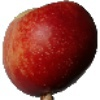

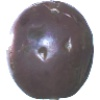

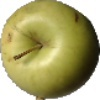

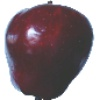

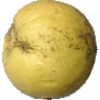

there are  1000  images in  fruit class

 MOTORBIKE


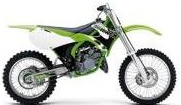

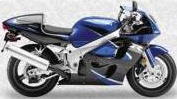

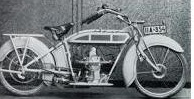

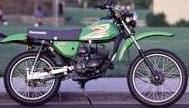

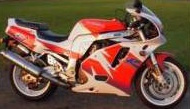

there are  788  images in  motorbike class

 PERSON


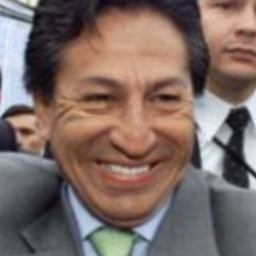

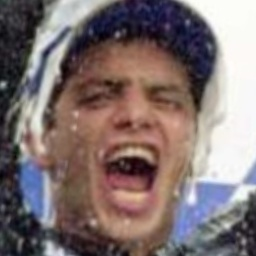

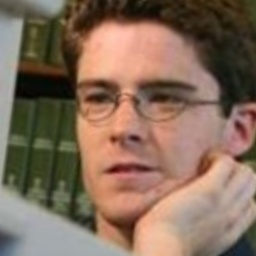

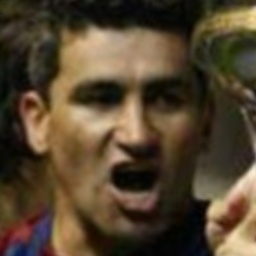

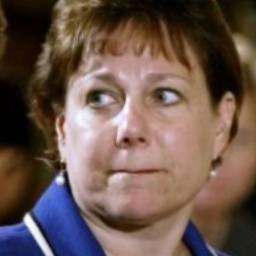

there are  986  images in  person class

 DOG


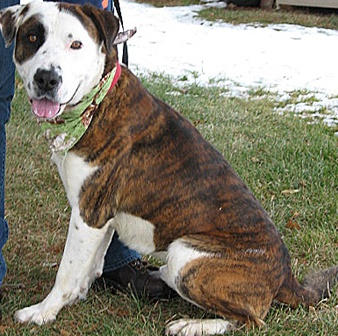

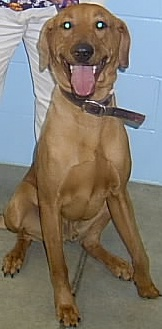

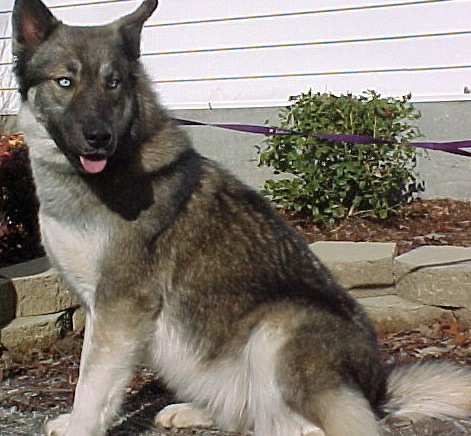

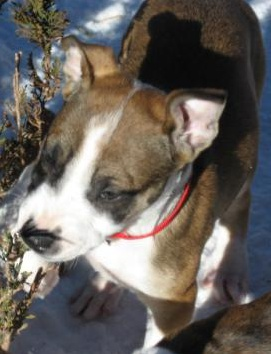

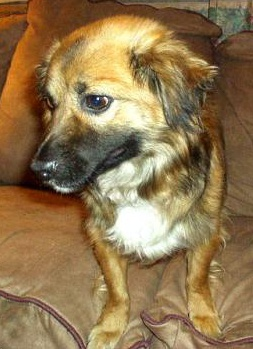

there are  712  images in  dog class

 CAT


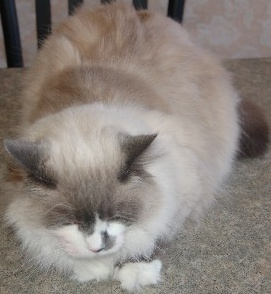

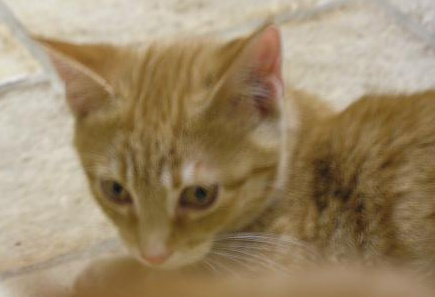

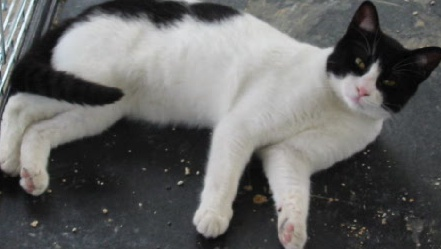

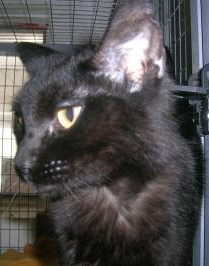

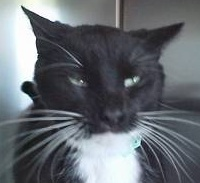

there are  885  images in  cat class

 AIRPLANE


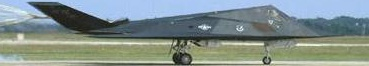

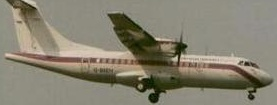

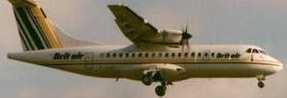

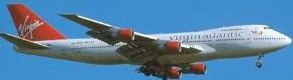

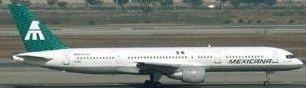

there are  737  images in  airplane class

 FLOWER


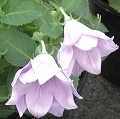

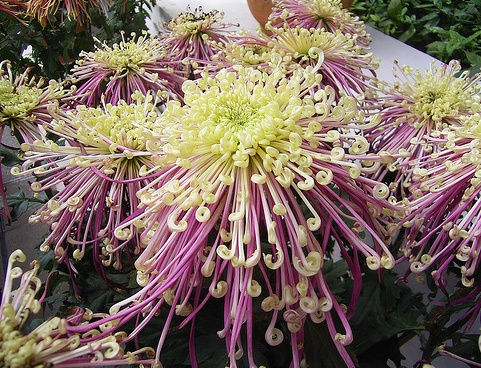

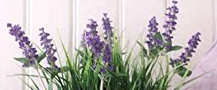

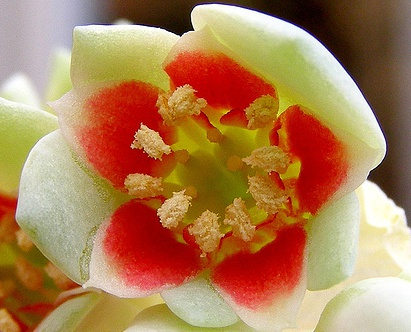

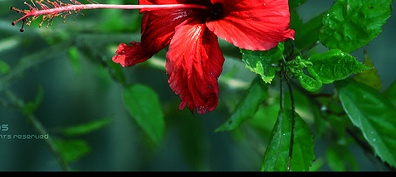

there are  843  images in  flower class

 CAR


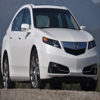

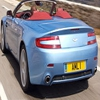

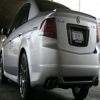

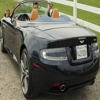

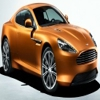

there are  978  images in  car class


In [213]:
num=[]
for label in labels:
    path = '/content/drive/My Drive/Projects/Natural Images/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    k = 0
    print('\n', label.upper())
    for image_path in folder_data:
        if k < 5:
            display(Image(path+image_path))
        k = k+1
    num.append(k)
    print('there are ', k,' images in ', label, 'class')

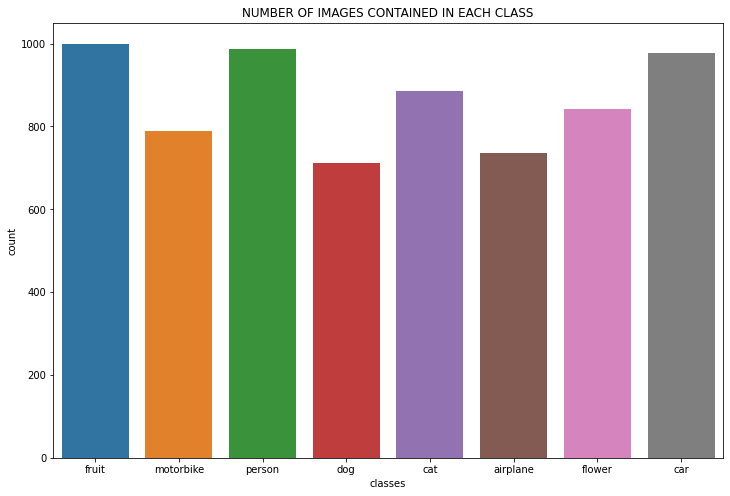

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,8))
sns.barplot(labels, num,ci=90)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('classes')
plt.ylabel('count')
plt.show()

In [215]:
x_data =[]
y_data = []
import cv2
for label in labels:
    path= '/content/drive/My Drive/Projects/Natural Images/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        image_resized = cv2.resize(image, (32,32))
        x_data.append(np.array(image_resized))
        y_data.append(label)

In [216]:
x_data= np.array(x_data)

In [217]:
y_data= np.array(y_data)

In [218]:
print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)

the shape of X is:  (6929, 32, 32, 3) and that of Y is:  (6929,)


In [219]:
#stadardizing the input data
x_data = x_data.astype('float32')/255

In [220]:
#converting the y_data into categorical:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y_encoded = le.fit_transform(y_data)
from keras.utils import to_categorical
y_categorical = to_categorical(y_encoded)

In [221]:
r = np.arange(x_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x_data[r]
Y = y_categorical[r]

In [222]:
y_categorical

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

In [224]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))

In [225]:
#let's compile the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [226]:
#fitting the model
history = model.fit(X_train, Y_train, epochs=25, validation_split=0.2,callbacks=callbacks_list)

Epoch 1/25
116/117 [============================>.] - ETA: 0s - loss: 1.2949 - accuracy: 0.5471
Epoch 00001: val_accuracy improved from -inf to 0.72982, saving model to weights.best.hdf5
117/117 [==============================] - 1s 6ms/step - loss: 1.2946 - accuracy: 0.5473 - val_loss: 0.7348 - val_accuracy: 0.7298
Epoch 2/25
107/117 [==========================>...] - ETA: 0s - loss: 0.6675 - accuracy: 0.7591
Epoch 00002: val_accuracy improved from 0.72982 to 0.78687, saving model to weights.best.hdf5
117/117 [==============================] - 1s 4ms/step - loss: 0.6598 - accuracy: 0.7614 - val_loss: 0.5659 - val_accuracy: 0.7869
Epoch 3/25
109/117 [==========================>...] - ETA: 0s - loss: 0.5224 - accuracy: 0.8114
Epoch 00003: val_accuracy improved from 0.78687 to 0.83854, saving model to weights.best.hdf5
117/117 [==============================] - 1s 4ms/step - loss: 0.5171 - accuracy: 0.8120 - val_loss: 0.4236 - val_accuracy: 0.8385
Epoch 4/25
105/117 [====================

In [227]:
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#Stop Model training in case of no Improvement
early_stop=EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto', baseline=None, restore_best_weights=False)
# Reduce learning rate when a metric has stopped improving.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.0001)
callbacks_list = [checkpoint,early_stop,reduce_lr]

In [228]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)              

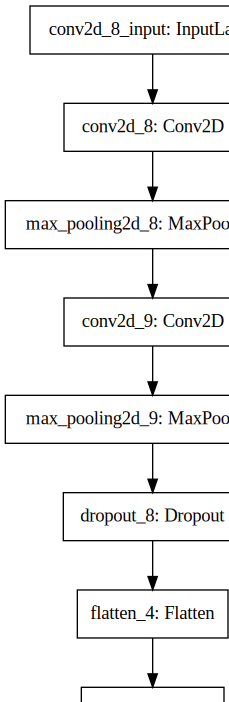

In [229]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))


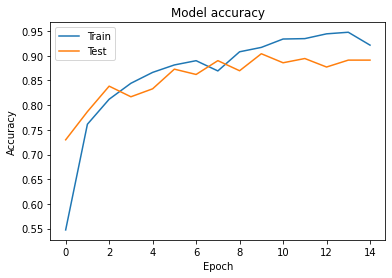

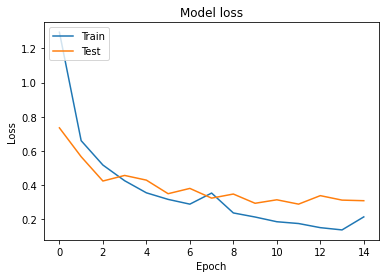

In [230]:
import matplotlib.pyplot as plot
plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [231]:
Y_pred = model.predict_classes(X_test)

In [232]:
#converting over Y test to actual labels.
Y_test = np.argmax(Y_test, axis = 1)

In [233]:
from sklearn.metrics import accuracy_score
print('the accuracy obtained on the test set is:', accuracy_score(Y_pred,Y_test))

the accuracy obtained on the test set is: 0.9055531263664189


In [234]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       239
           1       0.98      0.93      0.95       349
           2       0.72      0.74      0.73       279
           3       0.64      0.74      0.68       217
           4       0.93      0.90      0.92       272
           5       1.00      0.99      0.99       325
           6       0.95      0.99      0.97       274
           7       0.99      0.98      0.99       332

    accuracy                           0.91      2287
   macro avg       0.90      0.90      0.90      2287
weighted avg       0.91      0.91      0.91      2287



In [235]:
pd.DataFrame(Y_pred)

,0
0,4
1,5
2,3
3,1
4,6
...,...
2282,6
2283,1
2284,7
2285,4


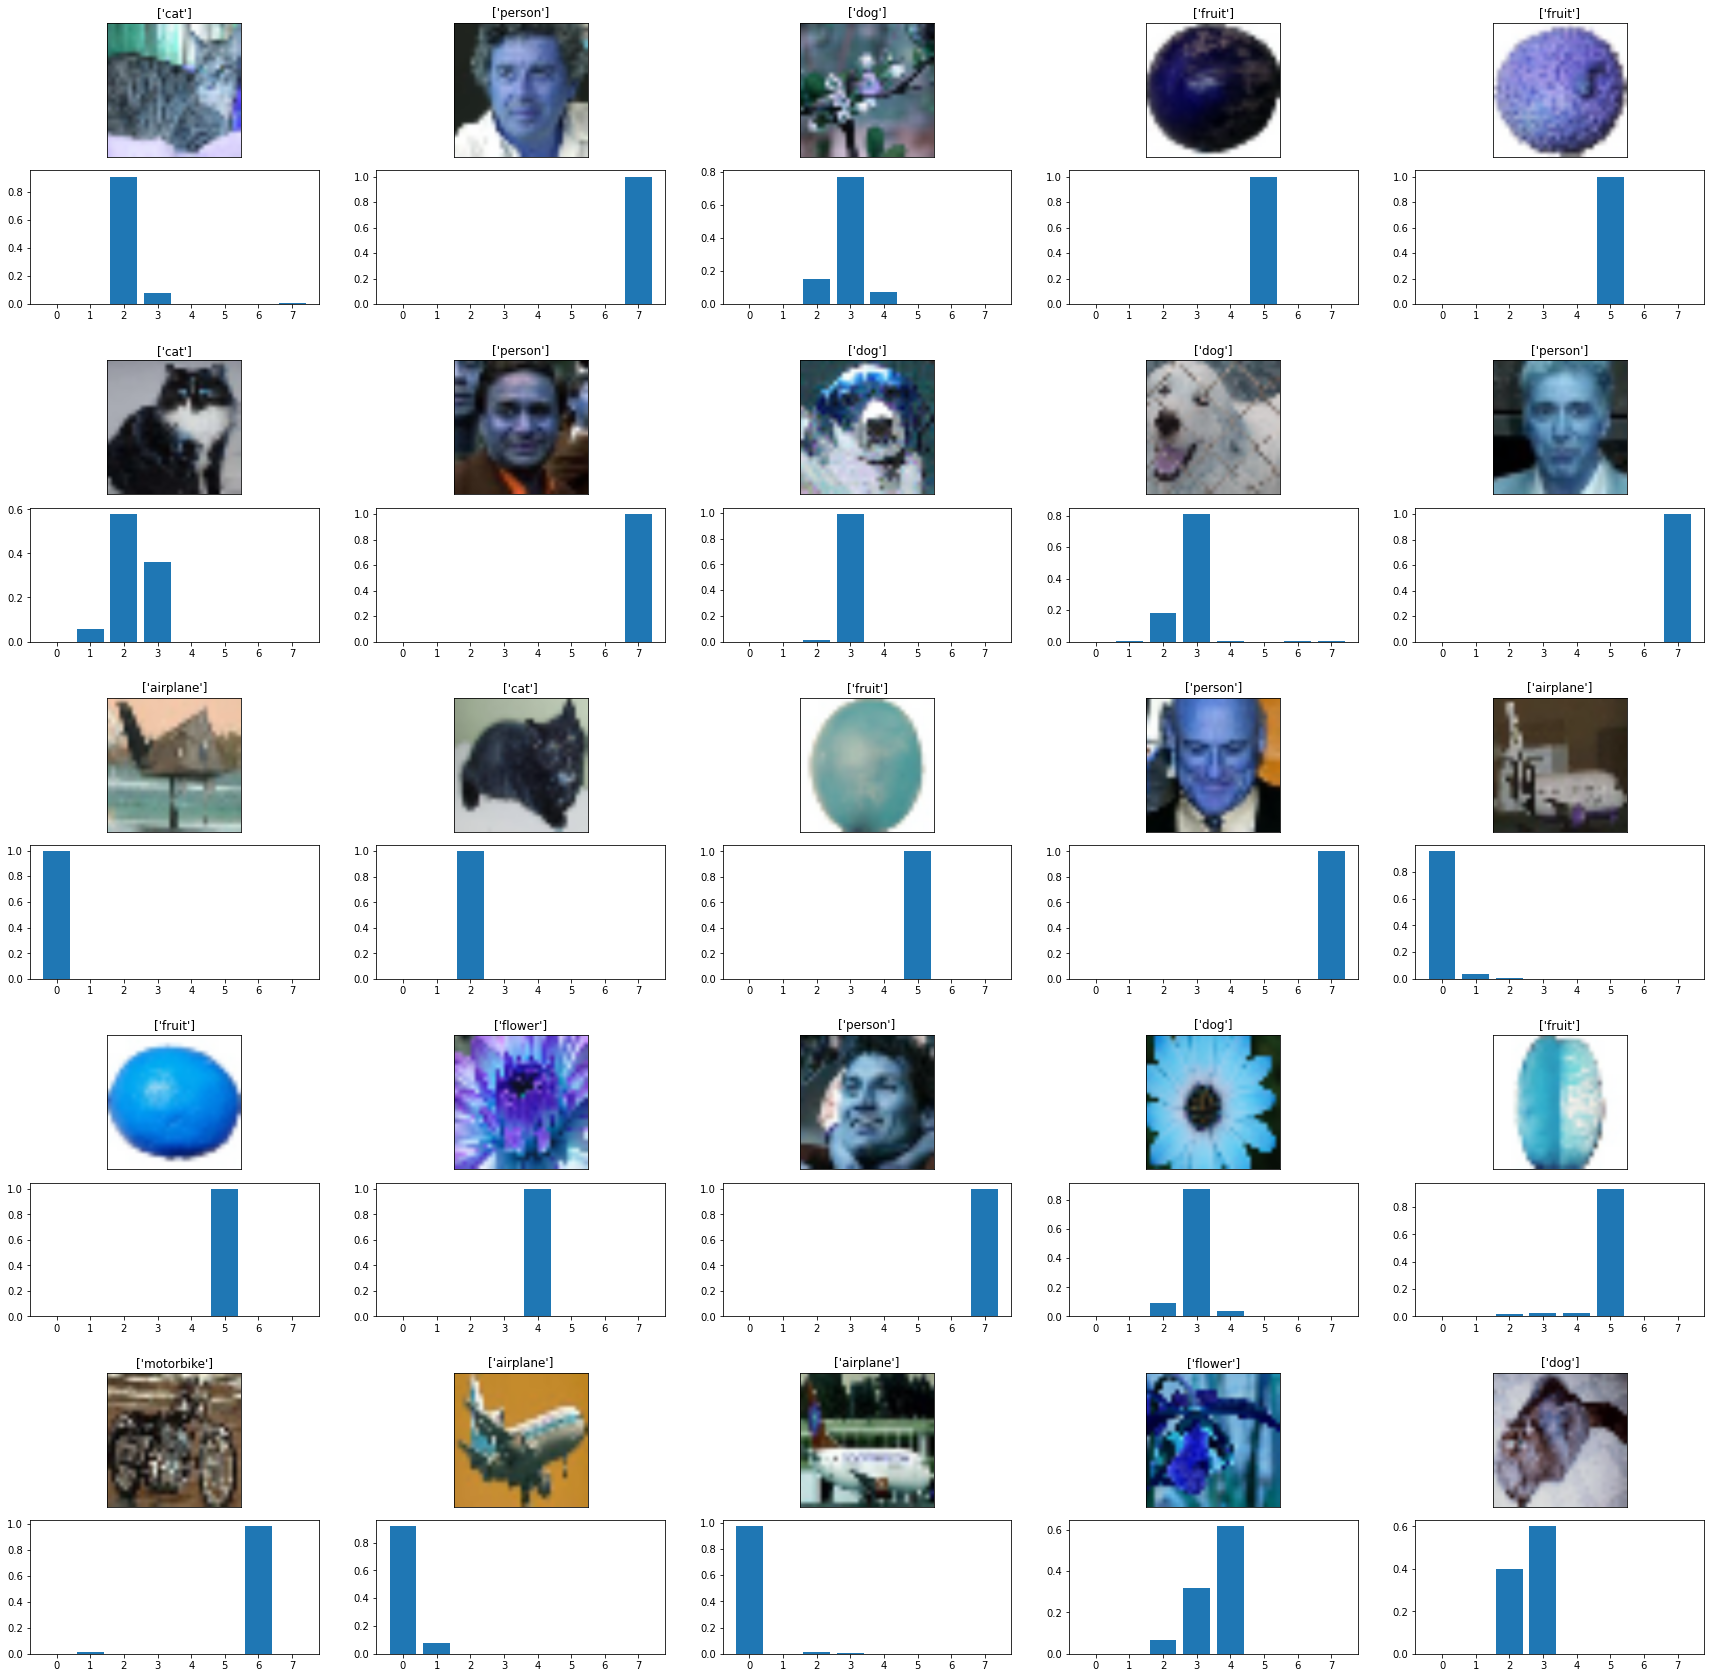

In [237]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(X_test))
    pred_image = np.array([X_test[rnd_number]]) 
    pred_class = le.inverse_transform([model.predict_classes(pred_image)[0]])
    pred_prob = model.predict(pred_image).reshape(8)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(cv2.resize(pred_image[j],(1000,1000)),cmap='gray')
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5,6,7],pred_prob)
            fig.add_subplot(ax)

fig.show()